# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [65]:
!pwd

/Users/etown/Desktop/eperry/projects/unit-projects/project-2/starter-code


In [66]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline 

### Step 2: Read in your data set 

In [67]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [68]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations.
GRE and GPA have two null values while prestige has one null value.

#### Question 2. Create a summary table

In [69]:
df_raw.describe() 

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: 

A low (or small) standard deviation indicates that the data points tend to be closer to the mean (average). A high (or large(r)) standard deviation shows that the data points are spread out over a wider range of values.

For this data set, GRE has a greater possible range - 220 to 800 - versus GPA which is 2.26 to 4.0. GRE has a larger standard deviation as the students scores have more variance in relation to the mean.

#### Question 4. Drop data points with missing data


In [70]:
#creating a new dataframe (df2) which excludes the null values.

df2 = df_raw.dropna()  

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 

Below, I ran a count on the new dataframe - df2 - in order to ensure the null values were dropped. Counts are all 397 now which signifies that the null values have been dropped.

In [71]:
df2.count() 

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA

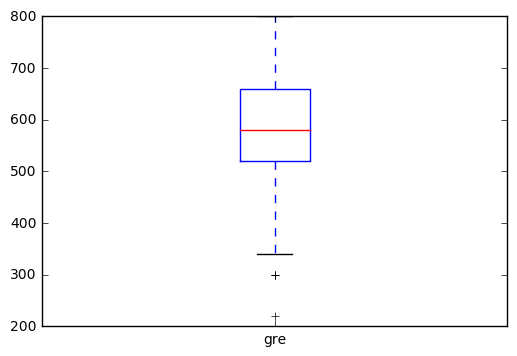

In [72]:
#boxplot 1

df2.gre.plot(kind = "box") 
plt.show() 

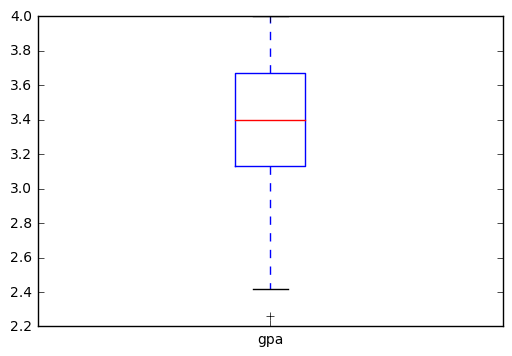

In [73]:
#boxplot 2

df2.gpa.plot(kind = "box")
plt.show() 

#### Question 7. What do this plots show?

Answer: 

Box plots show the outliers (any value that lies more than one and a half times the length of the box from either end of the box).

#### Question 8. Describe each distribution 

In [ ]:
# plot the distribution of each variable 

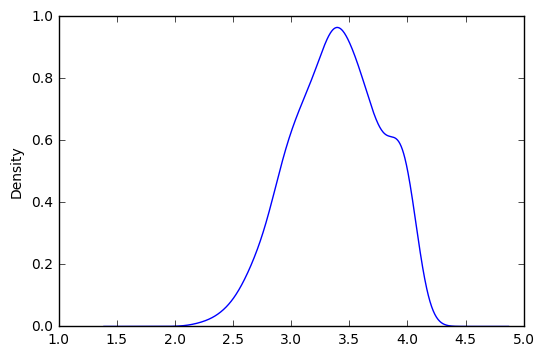

In [74]:
df2.gpa.plot(kind = "density")
plt.show() 

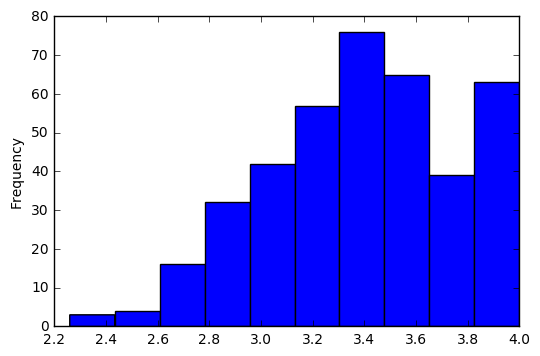

In [75]:
df2.gpa.plot(kind = "hist")
plt.show() 

In [76]:
print df2.gpa.skew() 

print df2.gpa.kurt() 

-0.216888932969
-0.563569899522


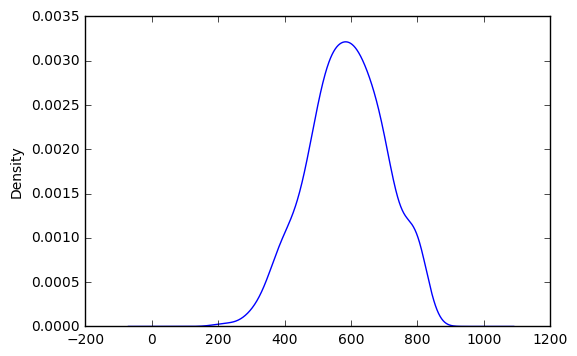

In [50]:
df2.gre.plot(kind = "density")
plt.show() 

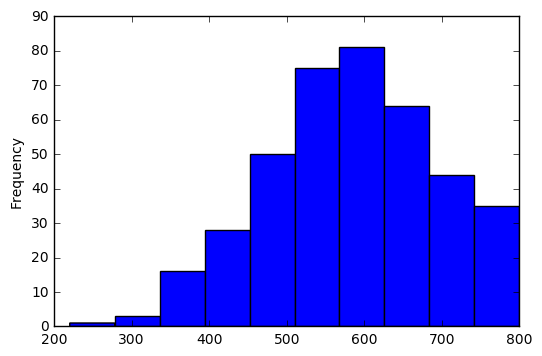

In [56]:
df2.gre.plot(kind = "hist")
plt.show() 

In [77]:
print df2.gre.skew() 

print df2.gre.kurt() 

-0.146046988216
-0.332864354651


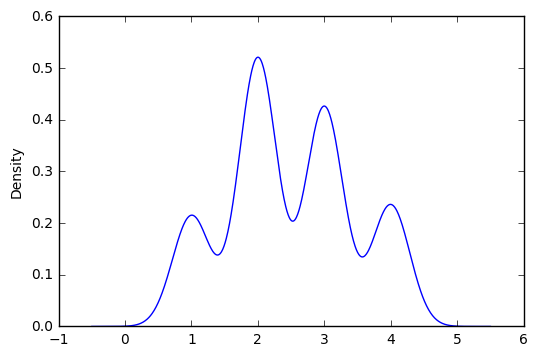

In [35]:
df2.prestige.plot(kind = "density")
plt.show() 

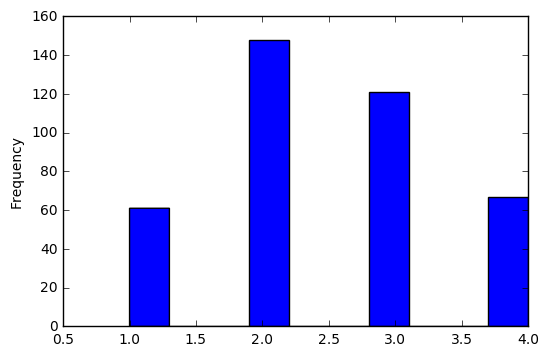

In [54]:
df2.prestige.plot(kind = "hist")
plt.show() 

In [78]:
print df2.prestige.skew() 

print df2.prestige.kurt() 

0.0865055528971
-0.90103795489


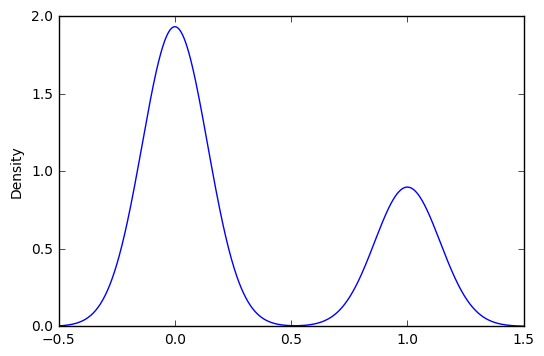

In [36]:
df2.admit.plot(kind = "density")
plt.show() 

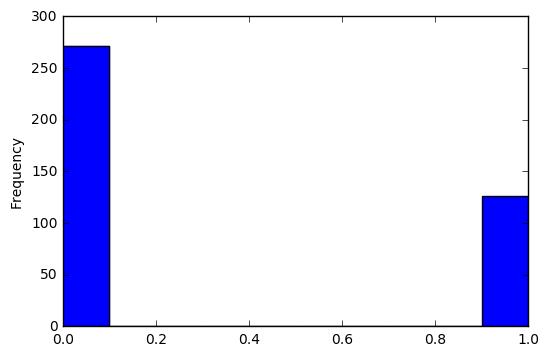

In [53]:
df2.admit.plot(kind = "hist")
plt.show() 

In [79]:
print df2.admit.skew() 

print df2.admit.kurt() 

0.787669147851
-1.38658817693


In [58]:
df2.describe() 

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: 

Yes, we would meet this requirement.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

No, the data does not need correction.

#### Question 11. Which of our variables are potentially colinear? 

In [ ]:
# create a correlation matrix for the data
# EP: See cell below

In [59]:
df2.corr() 

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [60]:
# saw this Methode using Google, so I thought I would try it.

print(df2.cov()) 

             admit           gre        gpa   prestige
admit     0.217197      9.772155   0.030852  -0.107505
gre       9.772155  13390.606315  16.824761 -13.648068
gpa       0.030852     16.824761   0.144558  -0.021957
prestige -0.107505    -13.648068  -0.021957   0.896967


#### Question 12. What did you find?

Answer: 

Answer: There is positive correlation between admit and gre as well as between admit and gpa. There's a negative correlation between admit and prestige.

In [62]:
# Below is practice.

df2.cov() 

,admit,gre,gpa,prestige
admit,0.217197,9.772155,0.030852,-0.107505
gre,9.772155,13390.606315,16.824761,-13.648068
gpa,0.030852,16.824761,0.144558,-0.021957
prestige,-0.107505,-13.648068,-0.021957,0.896967


#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

After following the steps above where I read-in the data, then reviewed it, and removed null values, I would take the following actions:
Determine the t value
Conduct hypothesis testing (review the P values and confidence interval)
Determine if I could accept or reject my hypothesis at both the 90 and 95% confidence intervals

#### Question 14. What is your hypothesis? 

Answer: 

The schools with the lowest and highest prestige ranking will have the fewest number of students admitted to graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

You can create a new dataframe (or update/overwrite the dataframe you read in) and insert the missing values.
The data can be created using reindexing.

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data